In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [18]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [21]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, m

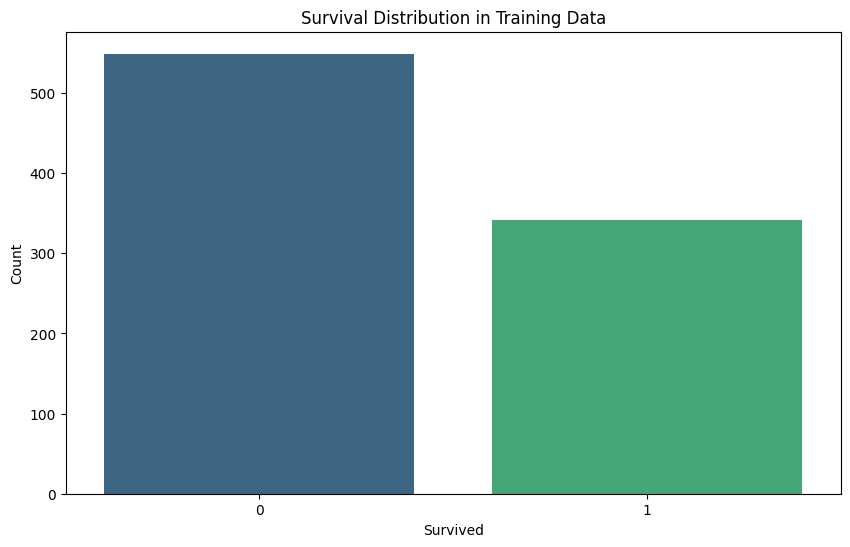

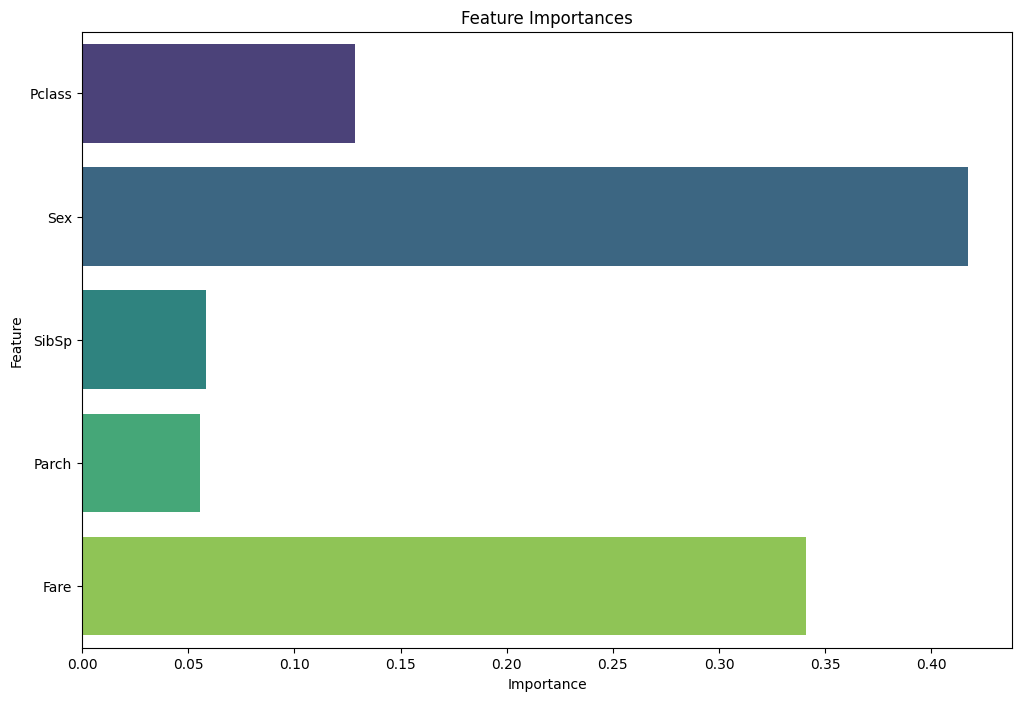

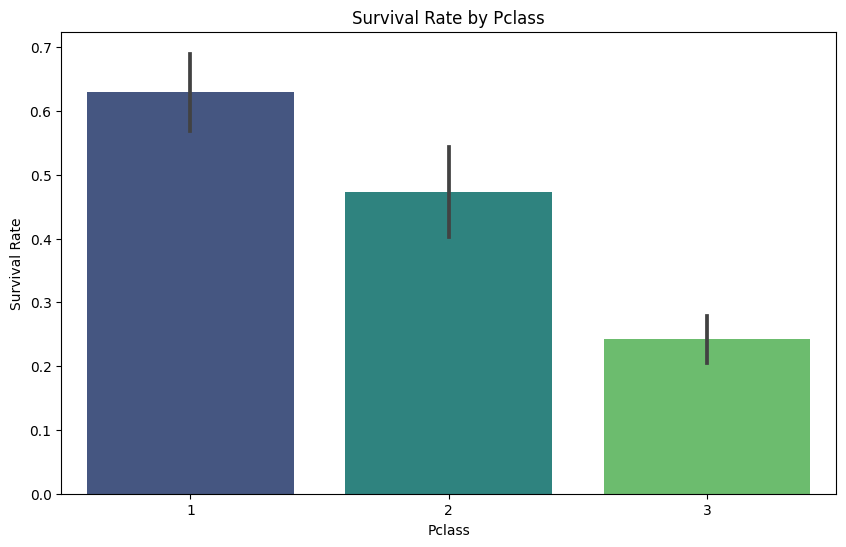

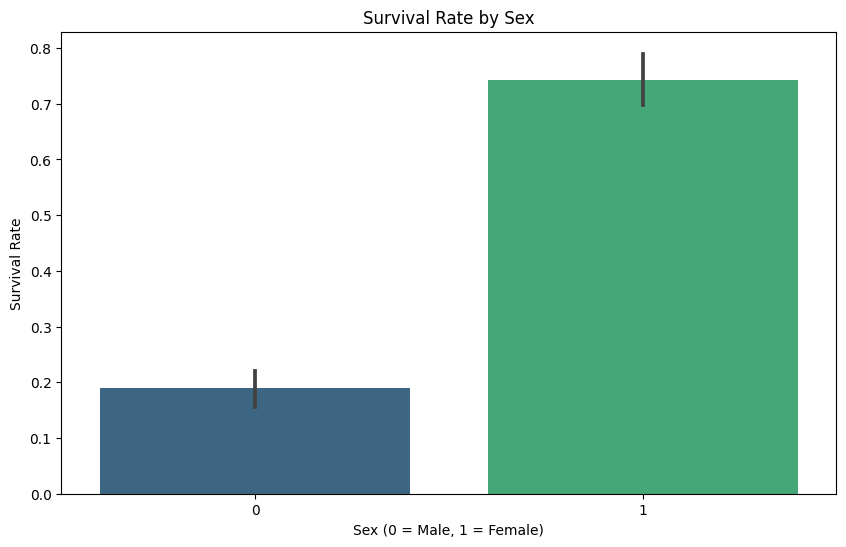

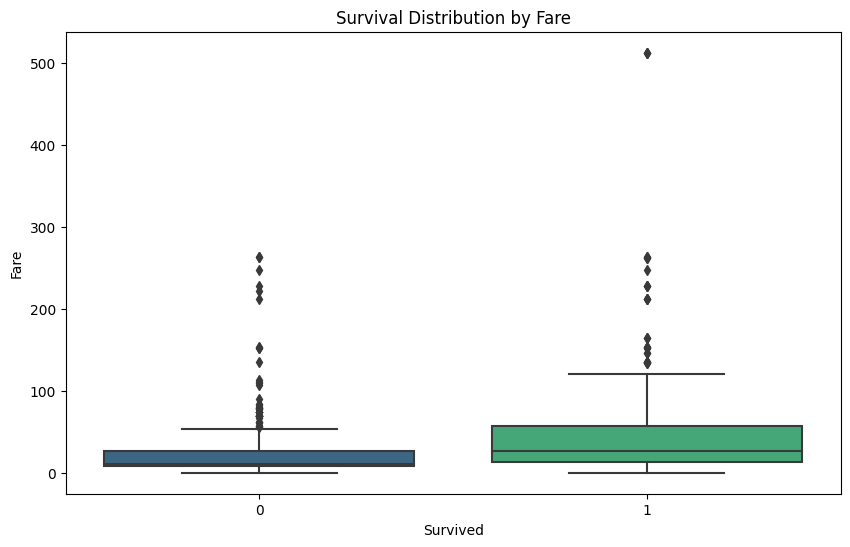

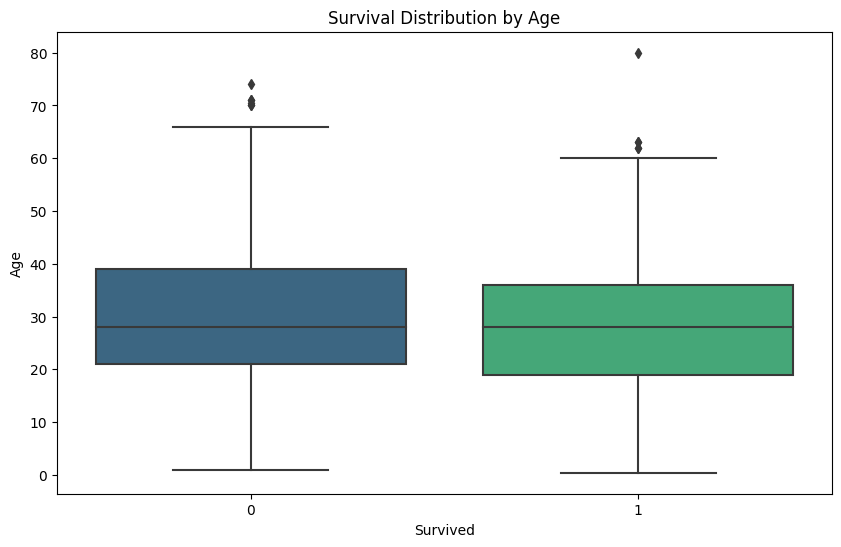

[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; tota

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# 填充Fare的缺失值
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# 將Sex列轉為數字
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# 定義特徵和標籤
features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y = train_data["Survived"]

# 定義參數網格
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [5, 10, 15],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}

# 初始化隨機森林模型
rf = RandomForestClassifier(random_state=1)

# 使用 GridSearchCV 進行超參數調整
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# 顯示最佳參數
print("Best parameters:", grid_search.best_params_)

# 使用最佳參數進行預測
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# 保存預測結果
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

# 資料視覺化
# 繪製生還情況的分佈圖
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Survived', palette='viridis')
plt.title('Survival Distribution in Training Data')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 繪製特徵重要性的長條圖
importances = best_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 繪製各類別特徵與生還率的關係圖
# 1. Pclass vs Survived
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Pclass', y='Survived', palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# 2. Sex vs Survived
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Sex', y='Survived', palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

# 3. Fare vs Survived
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Survived', y='Fare', palette='viridis')
plt.title('Survival Distribution by Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# 4. Age vs Survived
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Survived', y='Age', palette='viridis')
plt.title('Survival Distribution by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()